In [1]:
import pandas as pd


In [31]:
df = pd.read_csv("data.csv")
def to_seconds(x):
    if x == 'none':
        x = '7:00' 
    minutes = int(x.split(':')[0])
    seconds = int(x.split(':')[1])
    return minutes * 60 + seconds

df['has_third_base_by_5_15'] = df['Timing of 3rd before 5:15'].apply(lambda x: 1 if x != 'none' else 0)
df['Timing of 3rd before 5:15'] = df['Timing of 3rd before 5:15'].apply(lambda x: to_seconds(x))
df['Time to cut drones'] = df['Time to cut drones'].apply(lambda x: to_seconds(x))
df


,4:00 gateway count,Timing of 3rd before 5:15,Warpgate rush,Has a stargate before 4:00 started,robo before 4:00 started,Time to cut drones,has_third_base_by_5_15
0,4,420,1,0,1,240,0
1,2,288,1,1,0,360,1
2,1,297,1,1,1,360,1
3,2,420,1,0,1,300,0
4,3,275,1,1,0,360,1
5,3,292,1,1,1,360,1
6,4,305,1,0,1,240,1
7,3,300,1,1,0,360,1
8,2,241,1,1,0,360,1
9,3,284,1,1,1,330,1


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


In [33]:
import numpy as np

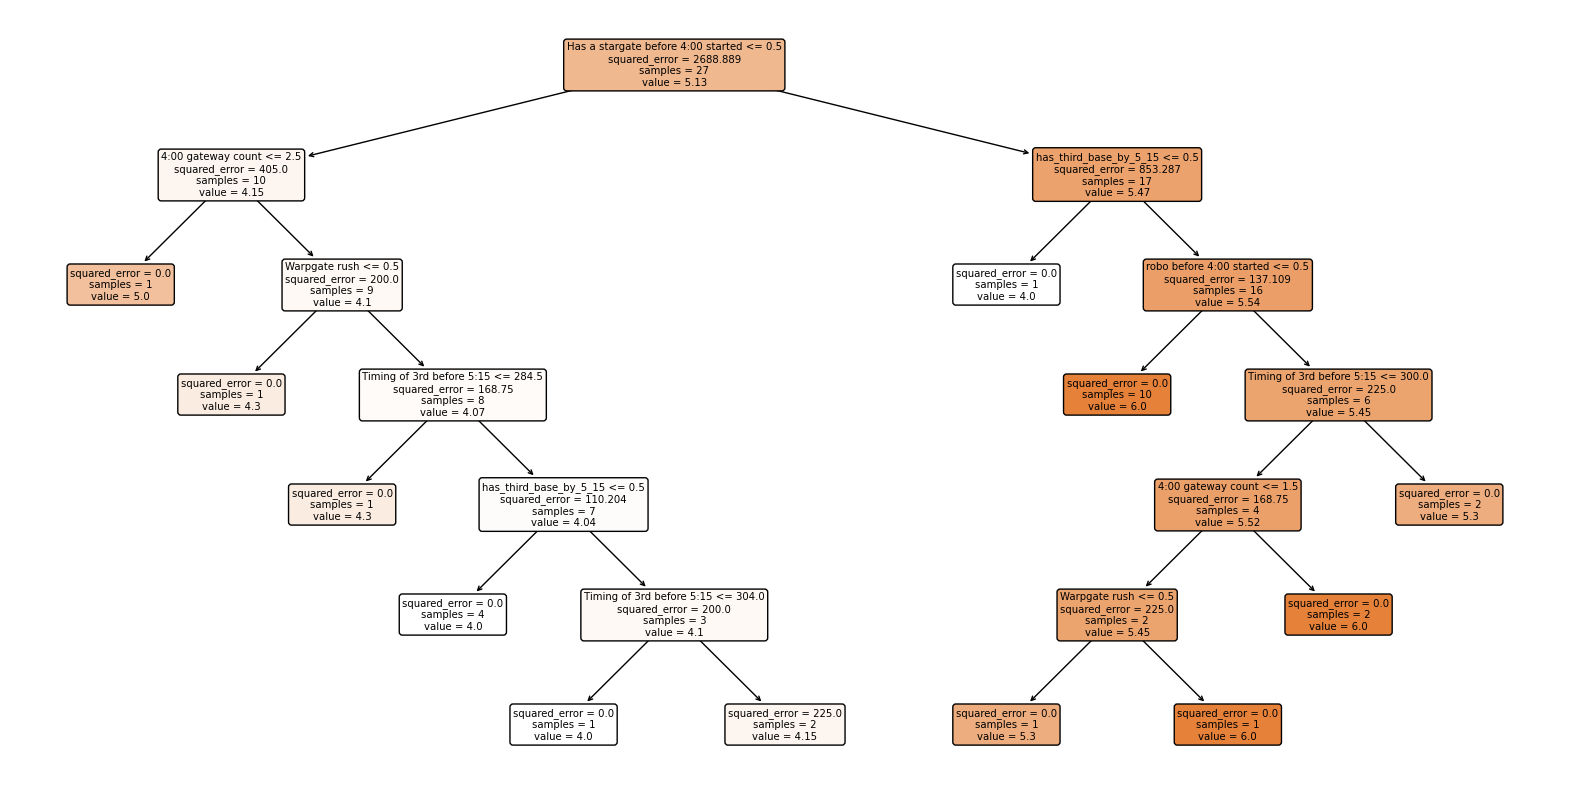

In [34]:
# Features = first 5 columns, Target = 6th column
X = df[[x for x in df.columns if x != 'Time to cut drones']]
y = df[[x for x in df.columns if x == 'Time to cut drones']]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.01, random_state=42
)

def sec_to_minsec(seconds):
    m = int(seconds // 60)
    s = int(seconds % 60)
    return f"{m}:{s:02d}"
    
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
tree = model.tree_
tree.value[:] = np.vectorize(lambda x: float(f"{int(x//60)}.{int(x%60):02d}"))(tree.value)

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X_train.columns, filled=True, rounded=True)
plt.show()
